In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style = "whitegrid")

In [18]:
titanic = sns.load_dataset("titanic")

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
print(titanic.shape)

print(titanic.info())

print(titanic.describe())

(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parc

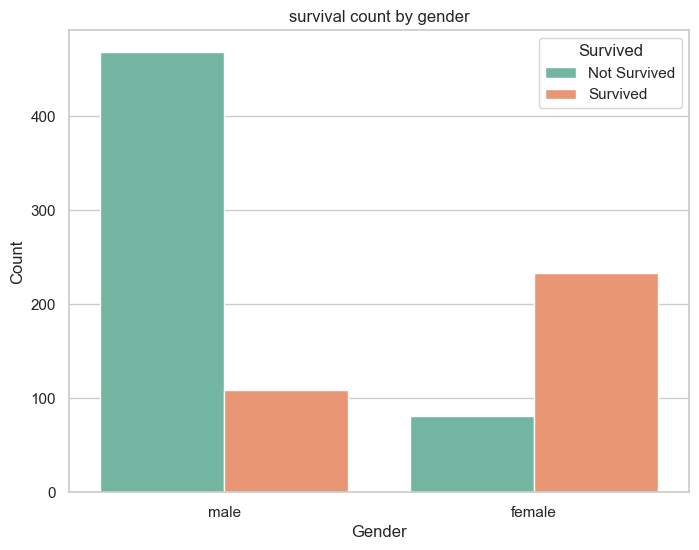

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data = titanic, x = "sex", hue = "survived", palette = 'Set2')
plt.title("survival count by gender")
plt.xlabel("Gender")
plt.ylabel('Count')
plt.legend(title = "Survived", labels = ['Not Survived', 'Survived'])

Text(0.5, 1.0, 'Age Distribution of passengers')

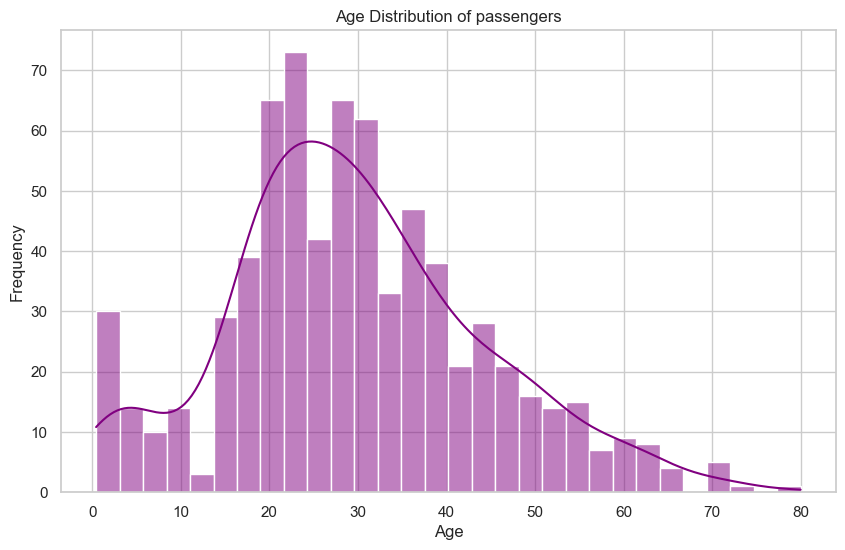

In [21]:
plt.figure(figsize = (10, 6))
sns.histplot(data = titanic, x = 'age', bins = 30, kde = True, color = 'purple')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of passengers')

Text(0, 0.5, 'Age')

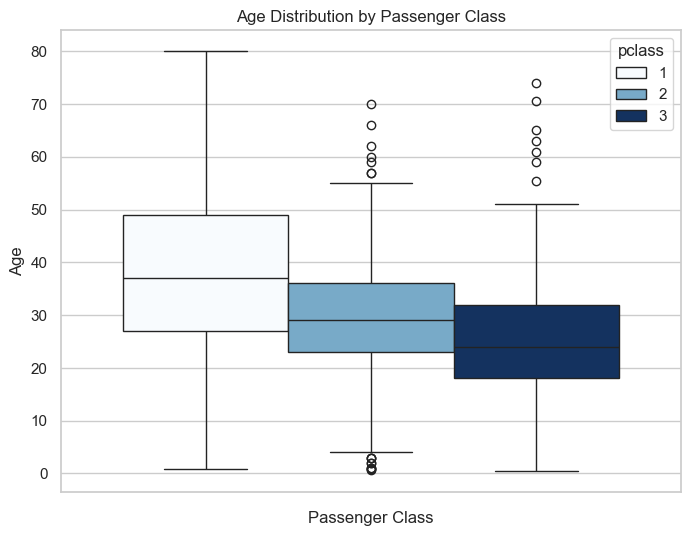

In [22]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = titanic, hue = 'pclass', y = 'age', palette = 'Blues')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

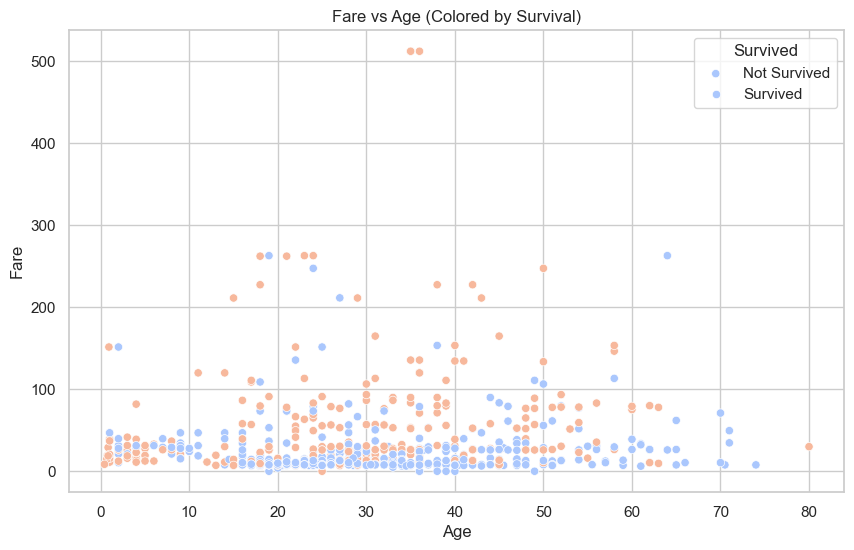

In [23]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = titanic, x = 'age', y = 'fare', hue = 'survived', palette='coolwarm')
plt.title('Fare vs Age (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

<Axes: >

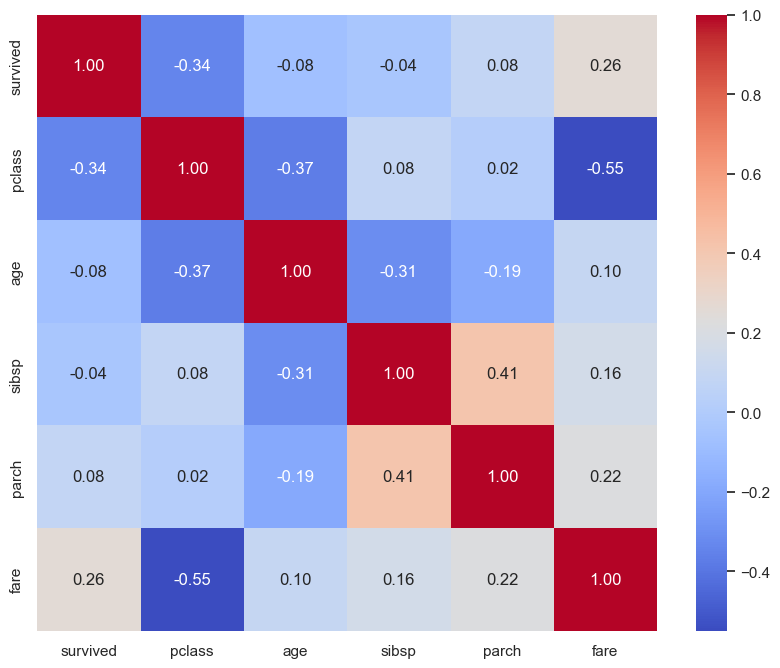

In [24]:
numeric_columns = titanic.select_dtypes(include = [np.number])

corr_matrix = numeric_columns.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

Text(0.5, 1.0, 'Proportion of Survivors')

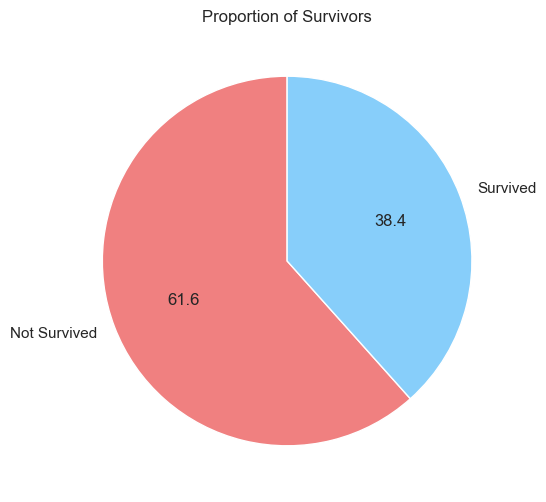

In [25]:
survival_counts = titanic['survived'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=['Not Survived', "Survived"], autopct="%1.1f", startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of Survivors')

Text(0, 0.5, 'Count')

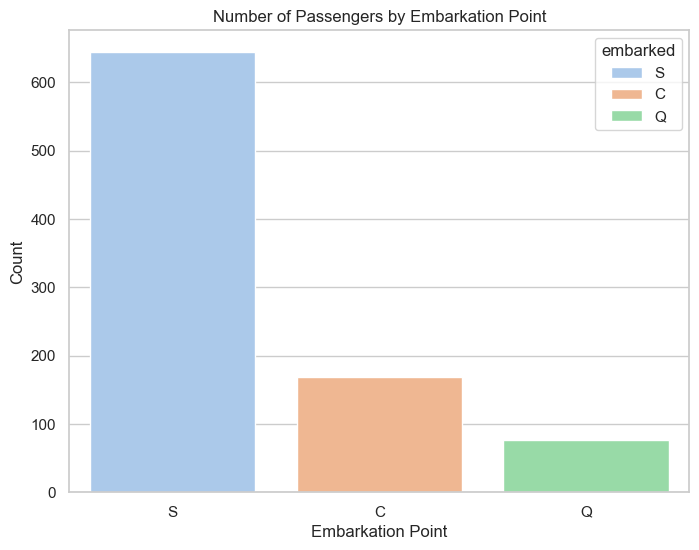

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data = titanic, x = 'embarked', hue = 'embarked', palette= 'pastel')
plt.title('Number of Passengers by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')

In [27]:
fig = px.pie(
    names = survival_counts.index,
    values = survival_counts.values,
    title = 'Proportion of Survivors',
    color_discrete_sequence = ['lightcoral', 'lightskyblue']
)

fig.update_traces(textinfo = 'percent+label', labels = ['Not Survived', "Survived"])

fig.show()

In [28]:
fig = px.histogram(
    titanic,
    x = 'age',
    nbins = 30,
    marginal = 'rug',
    title = 'Age Distribution of Passengers',
    color = 'survived',
    color_discrete_sequence = ['green', 'orange'],
    opacity = 0.5
)

fig.update_layout(
        xaxis_title="Age",
    yaxis_title="Frequency",
    legend_title="Survived"
)

fig.for_each_trace(
    lambda trace: trace.update(name = "Survived" if trace.name == "1" else "Not Survived")
)

fig.show()

In [29]:
fig = px.box(
    titanic,
    x = "pclass",
    y = 'age',
    color = 'pclass',
    title = 'Age Distribution by Passenger Class',
    labels = {'pclass': 'Passenger Class', 'age': 'Age'},
    color_discrete_sequence = ['purple', 'teal', 'gold']
)

fig.update_layout(
    xaxis_title="Passenger Class",
    yaxis_title="Age"
)

fig.show()

In [30]:
fig = px.scatter(
    titanic,
    x = 'age',
    y = 'fare',
    color = 'survived',
    hover_data = ['sex', 'pclass'],
    title = 'Fare vs Age (Colored by Survival)',
    color_discrete_sequence = ['red', 'blue']
)

fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Fare",
    legend_title="Survived"
)

fig.show()

In [31]:
fig = go.Figure(
    data = go.Heatmap(
        z = corr_matrix.values,
        x = corr_matrix.columns,
        y = corr_matrix.columns,
        colorscale = 'RdBu',
        zmin = 1,
        zmax = 1,
        colorbar = dict(title = 'Correlation')
    )
)

fig.update_layout(
    title='Correlation Matrix',
    xaxis_title="Features",
    yaxis_title="Features"
)

fig.show()